<a href="https://colab.research.google.com/github/Shivy40/Pong-Project/blob/main/Stock_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [441]:
start = '2014-01-01'
end = '2024-03-09'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [442]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600
2024-03-06,134.240005,134.740005,131.949997,132.559998,132.559998,23175200


In [443]:
data.reset_index(inplace=True)

In [444]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...,...
2558,2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2559,2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600
2560,2024-03-06,134.240005,134.740005,131.949997,132.559998,132.559998,23175200
2561,2024-03-07,133.889999,135.820007,132.660004,135.240005,135.240005,24107300


In [445]:
ma_100_days = data.Close.rolling(100).mean()

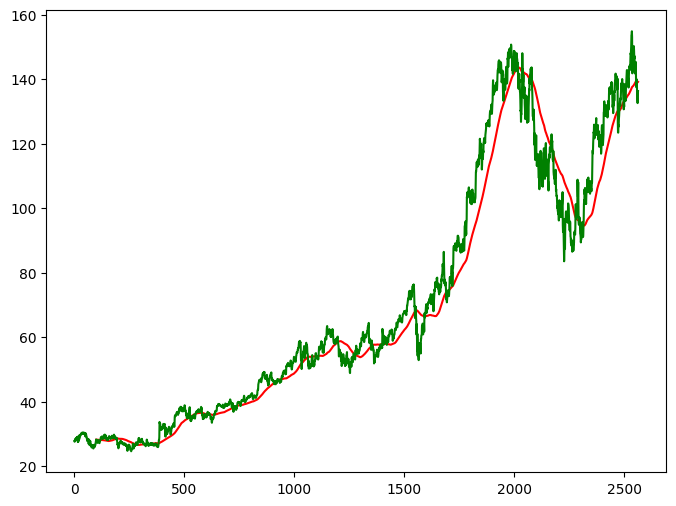

In [446]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [447]:
ma_200_days = data.Close.rolling(200).mean()

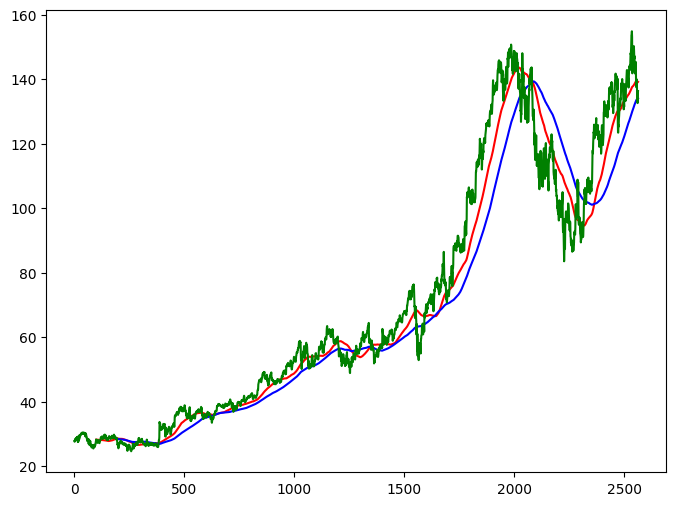

In [448]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [449]:
data.dropna(inplace=True)

In [450]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [451]:
data_test.shape[0]

513

In [452]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [453]:
data_train_scale = scaler.fit_transform(data_train)

In [454]:
x = []
y = []


for i in range (100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])




In [455]:
x, y = np.array(x), np.array(y)

In [456]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [457]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [458]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [459]:
model.fit(x,y, epochs = 50, batch_size=32, verbose =1)

Epoch 1/50
61/61 [==============================] - 60s 326ms/step - loss: 0.0782
Epoch 2/50
61/61 [==============================] - 18s 294ms/step - loss: 0.0693
Epoch 3/50
61/61 [==============================] - 19s 314ms/step - loss: 0.0677
Epoch 4/50
61/61 [==============================] - 19s 311ms/step - loss: 0.0676
Epoch 5/50
61/61 [==============================] - 19s 312ms/step - loss: 0.0675
Epoch 6/50
61/61 [==============================] - 19s 313ms/step - loss: 0.0669
Epoch 7/50
61/61 [==============================] - 19s 315ms/step - loss: 0.0668
Epoch 8/50
61/61 [==============================] - 18s 293ms/step - loss: 0.0665
Epoch 9/50
61/61 [==============================] - 19s 313ms/step - loss: 0.0666
Epoch 10/50
61/61 [==============================] - 18s 297ms/step - loss: 0.0664
Epoch 11/50
61/61 [==============================] - 18s 303ms/step - loss: 0.0663
Epoch 12/50
61/61 [==============================] - 19s 302ms/step - loss: 0.0665
Epoch 13/50
6

In [460]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_64 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_65 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_65 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_66 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_66 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_67 (LSTM)              (None, 100, 120)        

In [461]:
pas_100_days = data_train.tail(100)

In [462]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [463]:
data_test_scale = scaler.fit_transform(data_test)

In [464]:
x = []
y =[]


for i in range (100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [465]:
y_predict = model.predict(x)

17/17 [==============================] - 2s 86ms/step


In [466]:
scale = 1/scaler.scale_

In [467]:
y_predict = y_predict*scale

In [468]:
y = y*scale

ValueError: x and y can be no greater than 2D, but have shapes (513,) and (513, 100, 1)

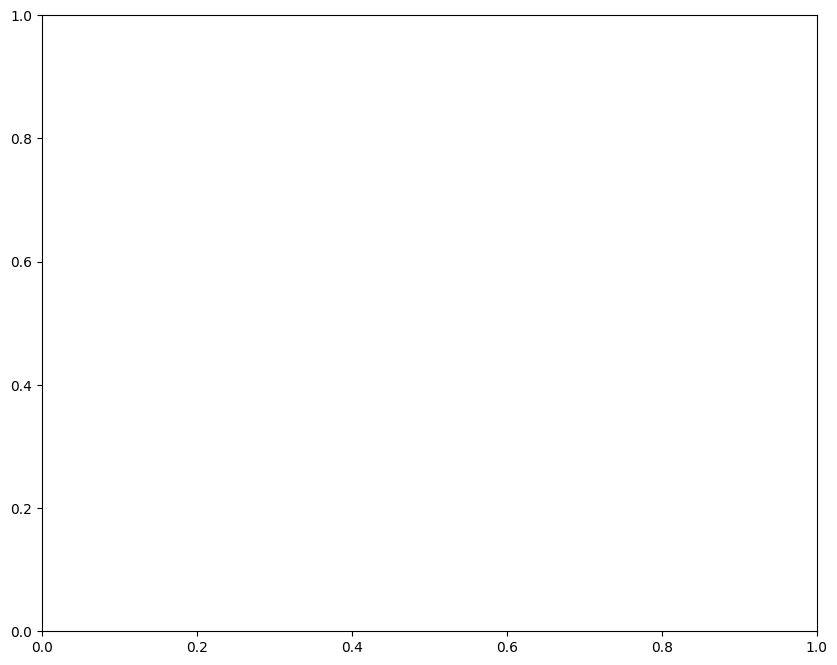

In [469]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()